# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import AutoLocator
from matplotlib.pyplot import hist
%matplotlib inline

# 1.1 Cleaning Messy Outcome Labels
1. Loading the cases

In [2]:
cases_train = pd.read_csv('../data/cases_2021_train.csv')
cases_train.head()

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,Hospitalized,NaN
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,Recovered,NaN
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,Hospitalized,NaN
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,Hospitalized,NaN
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,Hospitalized,NaN


2. Outcome Distribution

In [3]:
cases_train.groupby('outcome').size()

outcome
Alive                               127
Dead                                  9
Death                                 4
Deceased                           3361
Died                                  4
Discharged                            2
Discharged from hospital              3
Hospitalized                     135524
Receiving Treatment                 183
Recovered                         62875
Stable                               24
Under treatment                     243
critical condition                    1
death                                29
died                                624
discharge                           114
discharged                           82
recovered                          2435
recovering at home 03.03.2020         2
released from quarantine              3
stable                              107
stable condition                     90
dtype: int64

3. Filling Outcome_Group 


In [4]:
hospitalzed = ['Discharged', 'Discharged from hospital', 'Hospitalized', 'critical condition',
'discharge', 'discharged']
nonhospitalized = ['Alive', 'Receiving Treatment', 'Stable', 'Under treatment', 'recovering at home 03.03.2020', 'released from quarantine', 'stable', 'stable condition']
deceased = ['Dead', 'Death', 'Deceased', 'Died', 'death', 'died']
recovered = ['Recovered','recovered']
cases_train.loc[cases_train["outcome"].isin(hospitalzed), "outcome_group"] ='hospitalized'
cases_train.loc[cases_train["outcome"].isin(nonhospitalized), "outcome_group"] ='nonhospitalized'
cases_train.loc[cases_train["outcome"].isin(deceased), "outcome_group"] ='deceased'
cases_train.loc[cases_train["outcome"].isin(recovered), "outcome_group"] ='recovered'
print(cases_train.groupby('outcome_group').size())
cases_train = cases_train.drop(columns="outcome")
cases_train.head()

outcome_group
deceased             4031
hospitalized       135726
nonhospitalized       779
recovered           65310
dtype: int64


,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,chronic_disease_binary,outcome_group
0,NaN,NaN,Maharashtra,India,19.20000,72.96667,23.05.2020,NaN,NaN,False,hospitalized
1,NaN,NaN,Maharashtra,India,18.94017,72.83483,18.05.2020,NaN,https://t.me/indiacovid/5075,False,recovered
2,NaN,NaN,Maharashtra,India,19.20000,72.96667,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,False,hospitalized
3,NaN,NaN,West Bengal,India,22.80862,88.79242,09.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,False,hospitalized
4,NaN,NaN,Maharashtra,India,18.94017,72.83483,17.05.2020,NaN,NaN,False,hospitalized


# Task 1.3 - Train data analysis

In [5]:
by_day=cases_train['date_confirmation'].value_counts().rename_axis('date').reset_index(name='counts')

by_day['date']=pd.to_datetime(by_day['date'], errors='coerce',infer_datetime_format=True)
by_day['counts']=by_day['counts'].astype(int)

by_day=by_day.sort_values(by='date')

In [6]:
by_day=by_day.dropna(axis=0)

In [7]:
totals=[]
totals.append(by_day['counts'].iloc[0])
for i in range(1,137):
       totals.append(totals[i-1]+by_day['counts'].iloc[i])

In [8]:
by_day['totals']=totals

In [9]:
by_day

,date,counts,totals
126,2020-01-06,2,2
130,2020-01-15,1,3
129,2020-01-18,1,4
133,2020-01-20,1,5
123,2020-01-21,3,8
...,...,...,...
3,2020-05-30,8710,189078
1,2020-05-31,9413,198491
6,2020-06-01,7297,205788
124,2020-06-02,2,205790


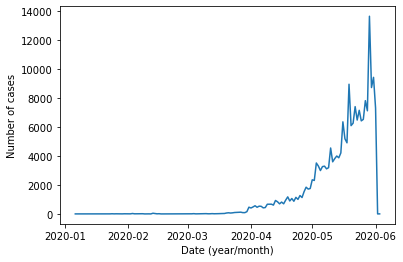

In [10]:
plt.plot(by_day['date'],by_day['counts'])
plt.xlabel('Date (year/month)')
plt.ylabel('Number of cases')
plt.savefig('fig1.png')
plt.show()

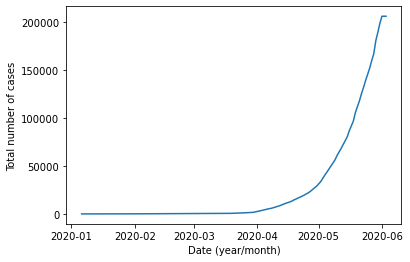

In [11]:
plt.plot(by_day['date'],by_day['totals'])
plt.xlabel('Date (year/month)')
plt.ylabel('Total number of cases')
plt.savefig('fig2.png')

# Test data

In [12]:
cases_test1=pd.read_csv('../data/cases_2021_test.csv')

In [13]:
cases_test=cases_test1['country'].value_counts().rename_axis('country').reset_index(name='counts')
cases_test['counts']=cases_test['counts'].astype(int)

In [14]:
cases_test

,country,counts
0,India,99378
1,Philippines,1487
2,Ghana,131
3,China,83
4,Nigeria,74
5,Ethiopia,42
6,Singapore,40
7,Cameroon,30
8,United States,18
9,Vietnam,14


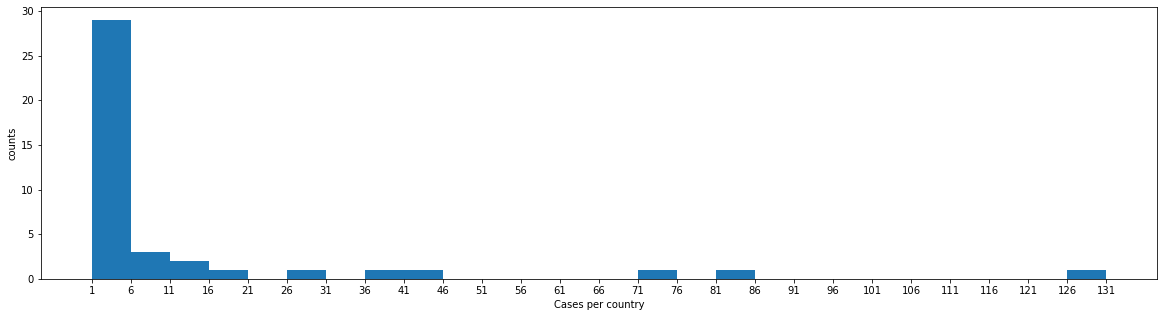

In [15]:
cases_test=cases_test.drop(labels=0,axis=0)
cases_test=cases_test.drop(labels=1,axis=0)
plt.figure(figsize=(20, 5))
plt.hist(cases_test['counts'],bins=26)
plt.xticks(np.linspace(1,131,27))
plt.xlabel('Cases per country')
plt.ylabel('counts')
plt.savefig('fig3.png')
plt.show()

# Location data

In [16]:
location_data=pd.read_csv('../data/location_2021.csv')
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,Afghanistan,2021-04-01 04:27:05,33.93911,67.709953,56454,2484,51550.0,2420.0,Afghanistan,145.020308,4.400043
1,NaN,Albania,2021-04-01 04:27:05,41.15330,20.168300,125157,2235,91271.0,31651.0,Albania,4349.051359,1.785757
2,NaN,Algeria,2021-04-01 04:27:05,28.03390,1.659600,117192,3093,81538.0,32561.0,Algeria,267.250200,2.639259
3,NaN,Andorra,2021-04-01 04:27:05,42.50630,1.521800,12010,115,11315.0,580.0,Andorra,15543.907332,0.957535
4,NaN,Angola,2021-04-01 04:27:05,-11.20270,17.873900,22311,537,20493.0,1281.0,Angola,67.884191,2.406884
...,...,...,...,...,...,...,...,...,...,...,...,...
3999,W.P. Kuala Lumpur,Malaysia,2021-04-01 04:27:05,3.13900,101.686900,37819,118,36631.0,1070.0,"W.P. Kuala Lumpur, Malaysia",2126.574449,0.312012
4000,W.P. Labuan,Malaysia,2021-04-01 04:27:05,5.28310,115.230800,2327,12,2282.0,33.0,"W.P. Labuan, Malaysia",2341.046278,0.515685
4001,W.P. Putrajaya,Malaysia,2021-04-01 04:27:05,2.92640,101.696400,1142,8,1102.0,32.0,"W.P. Putrajaya, Malaysia",1083.491461,0.700525
4002,Unknown,Malaysia,2021-04-01 04:27:05,NaN,NaN,0,0,0.0,0.0,"Unknown, Malaysia",NaN,NaN


In [17]:
location_totals=location_data.groupby('Country_Region').sum()

In [18]:
location_totals['Case_Fatality_Ratio']=100*(location_totals['Deaths'].div(location_totals['Confirmed']))

In [19]:
location_totals=location_totals.reset_index()

In [20]:
top10deaths=location_totals.sort_values(by='Deaths',ascending=False).head(10)

In [21]:
top10deaths

,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
182,US,121707.405039,-293182.487164,30531835,551457,0.0,559.0,2.975722e+07,1.806171
23,Brazil,-342.077100,-1308.973300,12763392,322138,11181371.0,1246129.0,2.008472e+05,2.523922
115,Mexico,695.047500,-3216.873200,2238887,203210,1773236.0,2035677.0,5.377750e+04,9.076385
79,India,831.177882,2945.020567,12221665,162927,11474683.0,584055.0,4.435946e+04,1.333100
138,Peru,-265.933101,-1881.943595,1548807,143416,1468457.0,1396868.0,1.101603e+05,9.259772
186,United Kingdom,422.469698,-509.497466,4359982,126955,13073.0,4219954.0,5.202145e+04,2.911824
85,Italy,903.972147,256.745065,3584899,109346,2913045.0,562508.0,1.248980e+05,3.050184
144,Russia,4527.343882,5156.031399,4494234,97219,4118709.0,278306.0,2.621680e+05,2.163194
62,France,77.169695,-416.763414,4705186,95798,301467.0,4307921.0,4.928911e+04,2.036009
66,Germany,825.149500,164.446100,2843644,76589,2539660.0,227395.0,5.341854e+04,2.693340


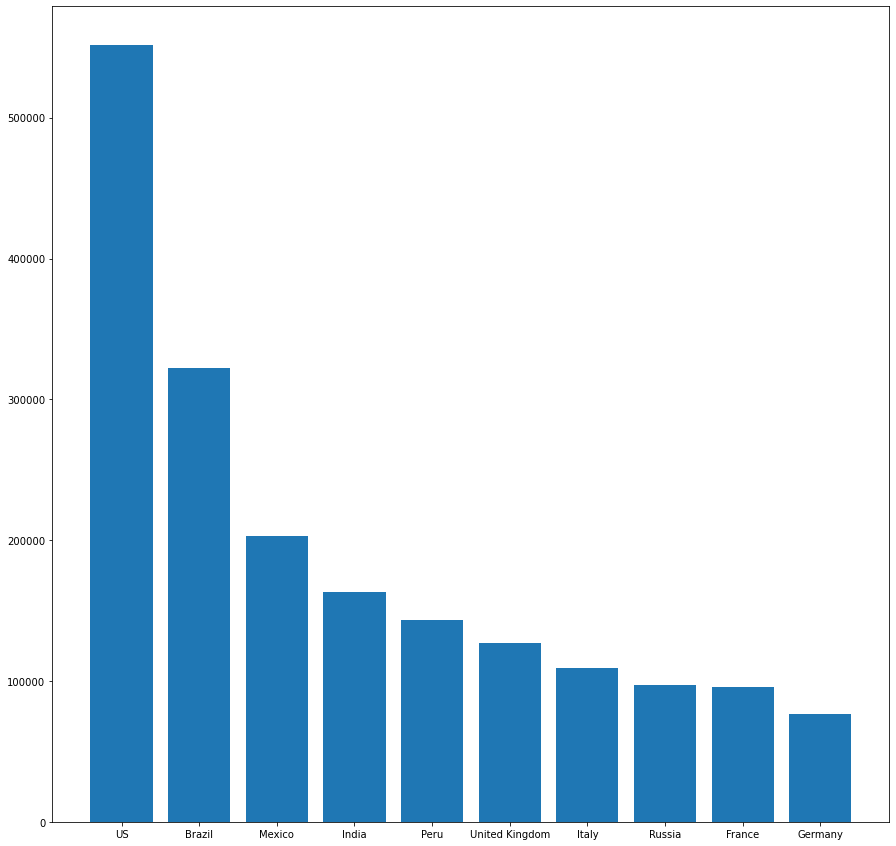

In [22]:
plt.figure(figsize=(15, 15))
plt.bar(top10deaths['Country_Region'],top10deaths['Deaths'])
plt.savefig('fig4.png')